In [2]:
import torch

from NTdatasets.cumming.monocular import MultiDataset
from NTdatasets.generic import GenericDataset

In [17]:
device = torch.device("cuda:1")
dtype = torch.float32

# load sample dataset to construct the model appropriately
datadir = './Mdata/'
num_lags = 10
dataset = MultiDataset(
    datadir=datadir,
    filenames=['expt04', 'expt05', 'expt06'],
    include_MUs=False,
    time_embed=True,
    num_lags=num_lags)

Loading expt04
  Time embedding...
  Done.
Loading expt05
  Time embedding...
  Done.
Loading expt06
  Time embedding...
  Done.


In [18]:
dataset.dfs.detach().numpy()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

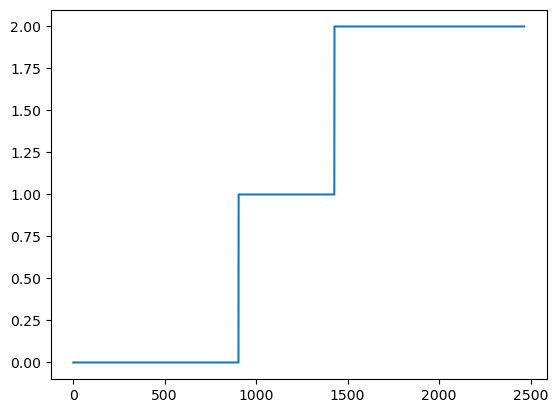

In [19]:
import matplotlib.pyplot as plt
plt.plot(dataset.file_index) # this maps each block to a file

In [24]:
len(dataset.file_index), len(dataset.block_inds) # this maps each block to the timepoints

(2466, 2466)

In [ ]:
# file_index --> block_inds --> timepoints

In [26]:
import pprint
pprint.pprint(dataset.block_inds)

[array([ 20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,
        33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
        46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
        59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
       111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123,
       124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136,
       137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149,
       150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162,
       163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175,
       176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188,
       189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 2

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [37]:
import numpy as np

a = np.diff([0,1,1,1,2,2,2,3,3,3,3,3,4,4,5,5,5,5,5,5])
b = np.where(a == 1)[0]
b

array([ 0,  3,  6, 11, 13])

In [39]:
b[0]+1, np.diff(b), len(a)-b[-1]

(1, array([3, 3, 5, 2]), 6)

In [49]:
dataset.block_inds[0]

array([ 20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,
        33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
        46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
        59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
       111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123,
       124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136,
       137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149,
       150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162,
       163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175,
       176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188,
       189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 20

In [50]:
exp_time_indices = []
for fi, file_index in enumerate(dataset.file_index):
    exp_time_indices.extend(dataset.block_inds[fi])

In [51]:
len(exp_time_indices)

937077

In [52]:
len(dataset.dfs)

988866

In [72]:
exp_to_time = {}
for fi, file_index in enumerate(dataset.file_index):
    # use try/except trick to speed up dictionary key checking
    try:
        exp_to_time[file_index].extend(dataset.block_inds[fi].flatten().tolist())
    except:
        exp_to_time[file_index] = [dataset.block_inds[fi].flatten().tolist()]

In [73]:
len(exp_to_time.keys()), len(exp_to_time.values()), dataset.NT

(3, 3, 988866)

In [ ]:
dataset.block_inds[0].tolist() + dataset.block_inds[0].tolist() +#%%
import torch

from NTdatasets.cumming.monocular import MultiDataset
from NTdatasets.generic import GenericDataset

In [ ]:
device = torch.device("cuda:1")
dtype = torch.float32

# load sample dataset to construct the model appropriately
datadir = './Mdata/'
num_lags = 10
dataset = MultiDataset(
    datadir=datadir,
    filenames=['expt04', 'expt05', 'expt06'],
    include_MUs=False,
    time_embed=True,
    num_lags=num_lags)

In [ ]:
dataset.dfs.detach().numpy()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(dataset.file_index) # this maps each block to a file

In [ ]:
len(dataset.file_index), len(dataset.block_inds) # this maps each block to the timepoints

In [ ]:
# file_index --> block_inds --> timepoints

In [ ]:
import pprint
pprint.pprint(dataset.block_inds)

In [ ]:
import numpy as np

a = np.diff([0,1,1,1,2,2,2,3,3,3,3,3,4,4,5,5,5,5,5,5])
b = np.where(a == 1)[0]
b

In [ ]:
b[0]+1, np.diff(b), len(a)-b[-1]

In [90]:
len(dataset.block_inds)

2466

In [ ]:
exp_time_indices = []
for fi, file_index in enumerate(dataset.file_index):
    exp_time_indices.extend(dataset.block_inds[fi])

In [ ]:
len(exp_time_indices)

In [ ]:
len(dataset.dfs)

In [83]:
exp_to_time = {}
for fi, file_index in enumerate(dataset.file_index):
    # use try/except trick to speed up dictionary key checking
    try:
        exp_to_time[file_index].extend(dataset.block_inds[fi].tolist())
    except:
        exp_to_time[file_index] = dataset.block_inds[fi].tolist()

In [84]:
len(exp_to_time.keys()), len(exp_to_time.values()), dataset.NT

(3, 3, 988866)

In [107]:
import numpy as np
a = np.array([2,3,4,6,8,3,6,5,3,2,4,7,9,6,4,6,8,1])
a[np.where((a > 1) & (a < 9))]

array([2, 3, 4, 6, 8, 3, 6, 5, 3, 2, 4, 7, 6, 4, 6, 8])